# Part II - Ford GoBike System Data Presentation
## by Valentine Munikah

## Investigation Overview


> The aim of this investigation is to identify how different features of the bike system data relate to each other. This investigation seeks to answer the following questions: How does journey duration fluctuate depending on user age, hour, day, and user type? What does the journey duration distribution look like? Which days are the busiest for trips? Which times of day are the most popular for trips?



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset has 16 columns and 183412 rows. This presentation aims at looking at the main aspects of bike-sharing in the larger San Francisco Bay area. The major purpose here is to identify the key determinants of trip duration by examining the relationship between trip duration and other explanatory variables in the dataset. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data=pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
data_clean = data.copy()

In [4]:
#correct datatypes
data_clean.start_station_id = data_clean.start_station_id.astype('str')
data_clean.end_station_id = data_clean.end_station_id.astype('str')
data_clean.bike_id = data_clean.bike_id.astype('str')
data_clean.start_time = data_clean.start_time.astype('datetime64')

In [5]:
#clean the data
#we'll use a for loop to fill in missing values
for col in ["start_station_name", "end_station_name", "member_birth_year", "member_gender"]:
    data_clean[col] = data_clean[col].fillna(data_clean[col].mode()[0])

data_clean["member_gender"] = data_clean["member_gender"].fillna("Male")

In [6]:
#Time Conversion
data_clean['duration_minute'] = data_clean['duration_sec']/60
data_clean['start_date'] = data_clean.start_time.dt.strftime('%Y-%m-%d')
data_clean['start_hourofday'] = data_clean.start_time.dt.strftime('%H')
data_clean['start_dayofweek'] = data_clean.start_time.dt.strftime('%A')
data_clean['start_month'] = data_clean.start_time.dt.strftime('%B')
data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,1988.0,Male,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February


In [7]:
#Lets add an additional column that computes user age
data_clean['member_age'] = 2019 - data_clean['member_birth_year']
data_clean.head().T

,0,1,2,3,4
duration_sec,52185,42521,61854,36490,1585
start_time,2019-02-28 17:32:10.145000,2019-02-28 18:53:21.789000,2019-02-28 12:13:13.218000,2019-02-28 17:54:26.010000,2019-02-28 23:54:18.549000
end_time,2019-03-01 08:01:55.9750,2019-03-01 06:42:03.0560,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420,2019-03-01 00:20:44.0740
start_station_id,21.0,23.0,86.0,375.0,7.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),The Embarcadero at Steuart St,Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza
start_station_latitude,37.7896,37.7915,37.7693,37.7748,37.8046
start_station_longitude,-122.401,-122.391,-122.427,-122.447,-122.272
end_station_id,13.0,81.0,3.0,70.0,222.0
end_station_name,Commercial St at Montgomery St,Berry St at 4th St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St
end_station_latitude,37.7942,37.7759,37.7864,37.7733,37.7927


In [8]:
# ignore warnings
import warnings
warnings.simplefilter("ignore")

df1 = data_clean[data_clean["duration_minute"] <= 60]
df2 = df1[data_clean["member_age"] <= 80]

df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,member_age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,February,60.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,19.116667,2019-02-28,23,Thursday,February,36.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,26.916667,2019-02-28,23,Thursday,February,30.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988.0,Other,No,26.166667,2019-02-28,23,Thursday,February,31.0


## Which time are most rides taken?

> The plot drawn populates the number of bike rides between 0000hours to 2359 hours.



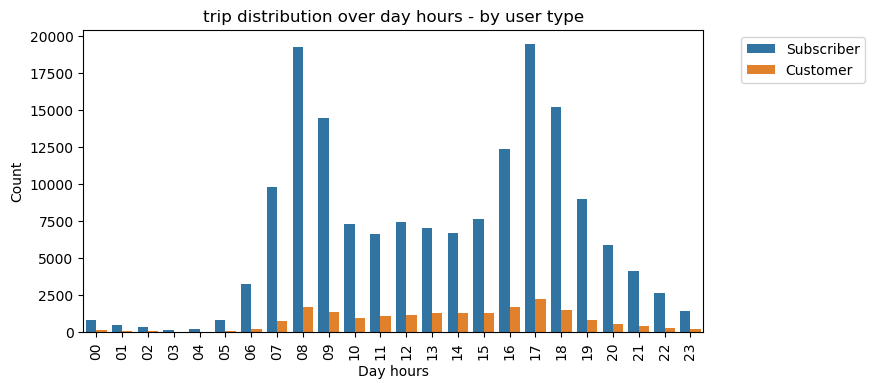

In [9]:
plt.figure(figsize = (8,4), dpi = 100)

sb.countplot(data = df2, x = "start_hourofday", hue='user_type')
plt.title("trip distribution over day hours - by user type")
plt.xlabel('Day hours')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

> From the graph we can see that a majority of rides are taken at 0800hours and at 1700hours. From this, we can deduce that majority users of the bike sharing system use the service before work and after work. From this graph also depicts that a majority of users who use the bike sharing service are subscribers.

## Common time for taking rides in relation to Gender

> This presentation showcases how different gender bike rides vary at different times of the day

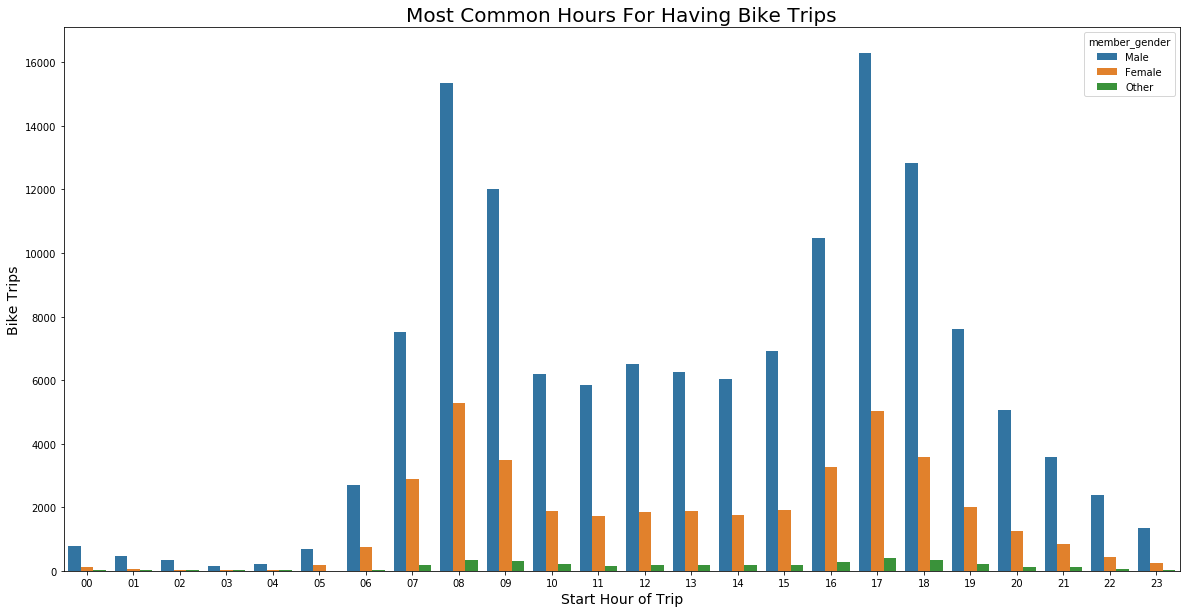

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sb.countplot(data=df2, x=df2['start_hourofday'], hue='member_gender')
plt.title('Most Common Hours For Having Bike Trips', fontsize=20)
plt.ylabel('Bike Trips', fontsize=14)
plt.xlabel('Start Hour of Trip', fontsize=14); 

From the visualization we can see that more female users are taking up rides as compared to male and other gender. We can also see that a majority of the rides are at 0800 hours and at 1700hours. The least number of rides are between 2300hors and 0500hours. This can be atrributed to people being asleep at these hours.

## How are user ages distributed?



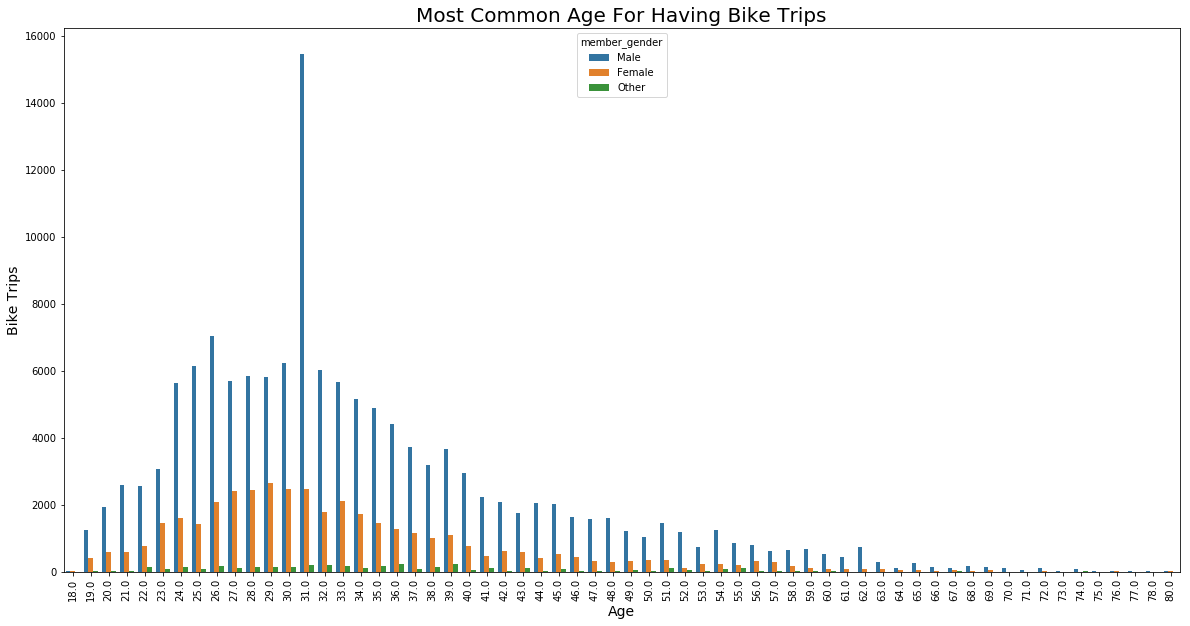

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sb.countplot(data = df2, x = df2['member_age'], hue='member_gender')
plt.title('Most Common Age For Having Bike Trips', fontsize=20)
plt.ylabel('Bike Trips', fontsize=14)
plt.xlabel('Age', fontsize=14);
plt.xticks(rotation=90);

We can see that a majority of users are females aged 24 years to 35 years.

## How does user age affect bike duration?
This visualisation compares how user age and bike duration compare.

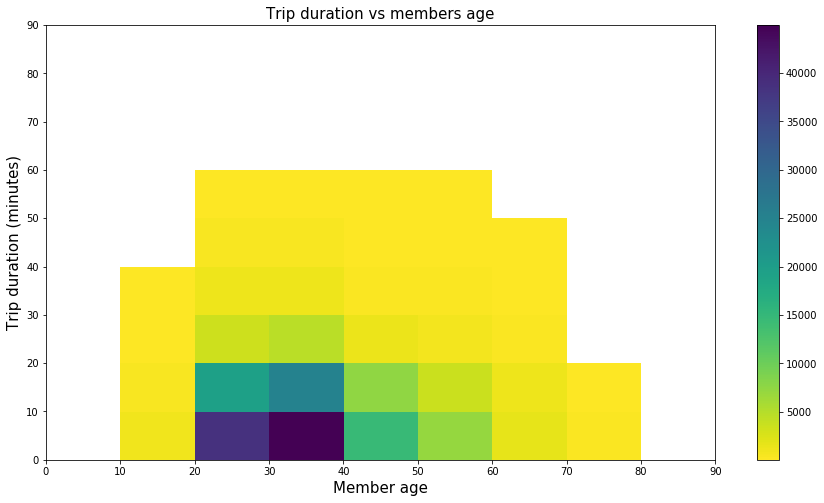

In [12]:
#define bin size for the x axis
bin_x=np.arange(0,100,10)
#define bin size for the y axis
bin_y=np.arange(0,100,10)
plt.figure(figsize=[15,8])
plt.hist2d(data = df2, x = 'member_age',y = 'duration_minute',cmin=50,cmap='viridis_r',bins=[bin_x,bin_y])
plt.colorbar()
plt.xlabel('Member age',fontsize=15)
plt.ylabel('Trip duration (minutes)',fontsize=15)
plt.title('Trip duration vs members age',fontsize=15);

From the visualization above, we can see that users between the age of 20 and 40 have trips whose duration is below 20 minutes. THis can be attributed to their busy lifestyles.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [16]:
$ jupyter nbconvert --to --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.5.0"

SyntaxError: invalid syntax (<ipython-input-16-096a930ff687>, line 1)

In [13]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
